# Repaso de teoría de probabilidad

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png" width="200px" height="180px" />

> La incertidumbre es un aspecto inevitable en la mayoría de aplicaciones; incluso, el debate si el mundo es determinista o estocástico es un debate abierto. Aún en el supuesto que el mundo siguiera un comportamiento determinista, las fuentes de incertidumbre están ahí, ya sea por una medición ruidosa, que los datos sean finitos, entre otros.

> En este sentido, es de vital importancia modelar esta incertidumbre dentro de los fenómenos de interés. Es por esto que los modelos que se consideran en este curso (y en gran parte de sus carreras profesionales) son probabilísticos.

> Por esa razón haremos un breve repaso de los conceptos que necesitaremos de teoría de probabilidad.

> **Objetivos:**
> - Repasar definiciones y resultados básicos de teoría de probabilidad.


> **Referencias:**
> 
> - Pattern Recognition and Machine Learning, by Christopher M. Bishop. Cap 1.2.
> - Bayesian Reasoning and Machine Learning by David Barber. Cap. 1.
> - Probabilistic Graphical Models: Principles and Techniques, by Daphne Koller and Nir Friedman. Cap. 2.
> - https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2022/mit18_05_s22_probability.pdf


<p style="text-align:right;"> Imagen recuperada de: https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png.</p>

___

## 0. Probabilidad vs Estadística

Los campos de probabilidad y estadística están profundamente conectados. Incluso es probable que ustedes no hagan diferenciación alguna entre una u otra. Esto es debido a que todos los elementos estadísticos están formulados con base en elementos probabilísticos.

- La proabilidad es el estudio lógico y matemático formal de la incertidumbre. En ese sentido existen algunas *reglas* que debemos seguir (y estudiaremos en este cuaderno), y a través de ellas las respuestas se siguen *lógicamente*. Acá hay que aclarar que los cómputos que resultan al seguir estas reglas pueden ser sumamente complejos.

> Por ejemplo, un problema probabilístico es: Se tiene una moneda justa (igual probabilidad de cara/sello). Se lanza la moneda 100 veces. ¿Cuál es la probabilidad de obtener 60 o más caras? Solo hay una respuesta correcta a este problema (al rededor de 0.028444), y aprenderemos a calcularla.

- En estadística, aplicamos probabilidad para obtener conclusiones de los datos.

> Por ejemplo, un problema estadístico es: Se tiene una moneda de procedencia desconocida. Para investigar si es una moneda justa, la tiramos 100 veces y contamos el número de caras. Digamos que contamos 60 caras. Nuestro trabajo como estadísticos es obtener conclusiones (inferencia) de estos datos. Hay varias formas de proceder, las cuales dependen del tipo de conclusión que se desea obtener y los cálculos que se usan para obtener la conclusión.


### 0.1 Interpretación frecuentista vs. Bayesiana

Respecto al último comentario del párrafo anterior, existen dos prominentes escuelas de estadística, que se conflictúan entre sí de vez en vez. Sus enfoques tienen raices en diferentes interpretaciones del significado de probabilidad.

- **La interpretación frecuentista** dice que la probabilidad mida la frecuencia de diferentes resultados de un experimento. Por ejemplo, decir que una moneda tiene un 50% de probabilidad de caer cara, significa que si la tiramos muchas veces, entonces esperamos que al rededor de la mitad de los tiros sean cara.

- **La interpretación Bayesiana** dice que la probabilidad es un concepto abstracto que mide el estado de conocimiento o grado de confianza que se tiene en una proposición. En la práctica, los Bayesianos no asignan un solo valor de probabilidad a que la moneda caiga cara. Ellos consideran un rango de valores, cada uno con su propia probabilidad de ser cierto.

![blowing-head](https://th.bing.com/th/id/OIP.T7MrIm2KwGXrrpJp_iGIYAAAAA?rs=1&pid=ImgDetMain)

Históricamente, el enfoque frecuentista ha dominado las áreas de biología, medicina, salud pública y ciencias sociales. Por otra parte, el enfoque Bayesiano ha resurgido en nuestra era de computadoras poderosas y big data. Tranquilos, no se trata de dos bandos entre los que hay que elegir. Podemos usar ambos enfoques en maneras complementarias.

## 1. Introducción a probabilidad

La teoría de probabilidad nos dota de las bases centrales para cuantificar y manipular la incertidumbre. Esto es bastante importante, teniendo en cuenta que *aunque en casos simples (dados, rifas, moneda al aire) podemos razonar con la incertidumbre de manera intuitiva*, en escenarios más complejos (muchas variables interactuando entre sí) la intuición se queda corta y se hace necesaria una manera formal para extender la intuición.

Para introducir algunos conceptos básicos de probabilidad, usamos un ejemplo bastante sencillo (tomado de Pattern Recognition and Machine Learning, by Christopher M. Bishop):

Supongamos que tenemos dos cajas, una <font color=red>roja</font> y una <font color=blue>azul</font>. En la caja roja tenemos <font color=green>2 manzanas</font> y <font color=orange>6 naranjas</font>, y en la caja azul tenemos <font color=green>3 manzanas</font> y <font color=orange>1 naranja</font>.

In [1]:
from matplotlib import pyplot as plt

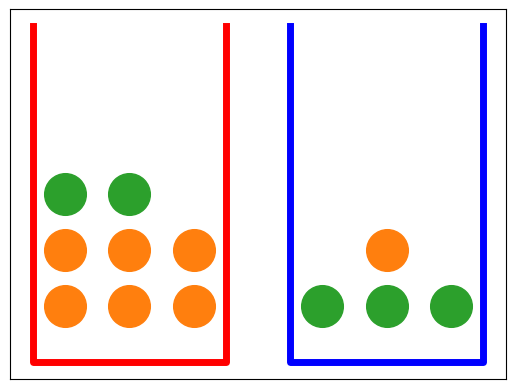

In [2]:
# Caja roja
plt.plot([0, 0, 3, 3], [3, 0, 0, 3], 'r', lw=5)
# 6 naranjas
plt.plot([0.5, 0.5, 1.5, 1.5, 2.5, 2.5],
         [0.5, 1., 0.5, 1., 0.5, 1.], 'o', ms=30, c='tab:orange')
# 2 manzanas
plt.plot([0.5, 1.5],
         [1.5, 1.5], 'o', ms=30, c='tab:green')
# Caja azul
plt.plot([4, 4, 7, 7], [3, 0, 0, 3], 'b', lw=5)
# 3 manzanas
plt.plot([4.5, 5.5, 6.5],
         [0.5, 0.5, 0.5], 'o', ms=30, c='tab:green')
# 1 naranjas
plt.plot([5.5],
         [1.], 'o', ms=30, c='tab:orange')
plt.xticks([])
plt.yticks([]);

Imaginemos que seleccionamos aleatoriamente una de las cajas, 40% de las veces seleccionamos la caja <font color=blue>azul</font> y el 60% de las veces seleccionamos la caja <font color=red>roja</font>, y de la caja seleccionada tomamos aleatoriamente una fruta, con igual probabilidad de seleccionar cualquier cualquier elemento dentro de la caja. Finalmente devolvemos la fruta a la caja original.

Definimos la identidad de la caja que seleccionamos como una **variable aleatoria** (V.A.), la cual denotamos como $C$, y puede tomar los valores <font color=red>r</font> y <font color=blue>a</font>.

Similarmente, definimos la identidad de la fruta seleccionada como una V.A., denotada por $F$, y que puede tomar los valores <font color=green>m</font> y <font color=orange>n</font>.

### ¿Cómo definimos la probabilidad de un evento?

Definiremos la probabilidad de un evento como **la fracción de veces que ocurre este evento entre la cantidad de repeticiones, cuando el número de repeticiones tiende a infinito**.

En este sentido, las probabilidades de seleccionar:

* <font color=red>La caja roja</font>: $p(C=r) = \frac{6}{10} = 0.6$
* <font color=blue>La caja azul azul</font>: $p(C=a) = \frac{4}{10} = 0.4$

A la luz de esta definición se intuyen dos reglas muy importantes:

1. Cualquier probabilidad debe ser un número en el intervalo $[0,1]$:
   
   $$
   0 \leq p(X=x) \leq 1.
   $$
   
2. Si los eventos son mutuamente excluyentes (la caja no puede ser roja y azul a la vez, por lo menos en este ejemplo), y son exhaustivos (la caja solo puede ser roja o azul), las probabilidades suman 1:

   $$
   \sum_{x} p(X=x) = 1.
   $$

Preguntas plausibles serían entonces:

- *¿Cuál es la probabilidad de seleccionar una manzana?*
- *Dado que elegimos una naranja, ¿Cuál es la probabilidad que la caja haya sido la azul?*

Notemos que estas probabilidades no las conocemos de antemano. Incluso, notemos que son probabilidades que involucran más de una variable. Sin embargo, tenemos la información necesaria para **inferir estas probabilidades**, no sin antes conocer la regla de la suma (**marginalización**), y la regla del producto (**regla de la cadena**).

Para obtener estas reglas en nuestro modo intuitivo de estudiar probabilidad, consideremos el caso más general en que tenemos dos V.A. $X$ y $Y$, las cuales pueden tomar los valores $x^i$ para $i=0,\dots,s$ y $y^j$ para $j=0,\dots,t$.

Supongamos que, de un total de $N$ repeticiones, 

- en $n_{ij}$ ocasiones obtuvimos $X=x^i$ y $Y=y^j$;
- en $c_{i}$ ocasiones obtuvimos $X=x^i$, sin importar el valor de $Y$;
- en $r_{j}$ ocasiones obtuvimos $Y=y^j$, sin importar el valor de $X$;

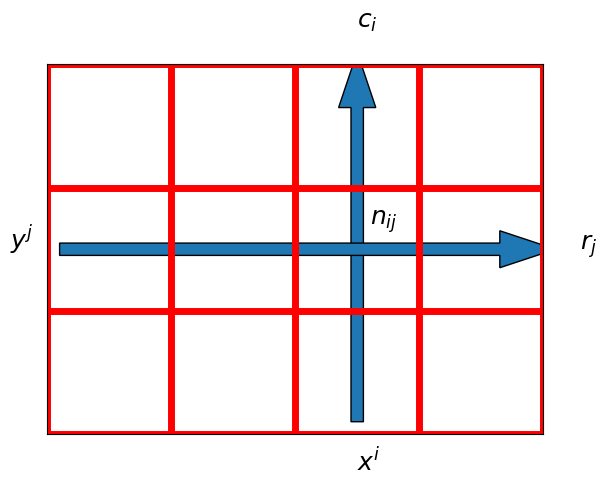

In [3]:
# Malla
plt.axhline(y=0, c='r', lw=5)
plt.axhline(y=1, c='r', lw=5)
plt.axhline(y=2, c='r', lw=5)
plt.axhline(y=3, c='r', lw=5)
plt.axvline(x=0, c='r', lw=5)
plt.axvline(x=1, c='r', lw=5)
plt.axvline(x=2, c='r', lw=5)
plt.axvline(x=3, c='r', lw=5)
plt.axvline(x=4, c='r', lw=5)
plt.text(-0.3, 1.5, '$y^j$', size=18)
plt.text(2.5, -0.3, '$x^i$', size=18)
plt.text(2.6, 1.7, '$n_{ij}$', size=18)
plt.text(2.5, 3.3, '$c_i$', size=18)
plt.arrow(2.5, 0.1, 0, 3., width=0.1, length_includes_head=True)
plt.text(4.3, 1.5, '$r_j$', size=18)
plt.arrow(0.1, 1.5, 4., 0, width=0.1, length_includes_head=True)
plt.axis([0, 4, 0, 3])
plt.xticks([])
plt.yticks([]);

De nuestra definición de probabilidad, tenemos que (suponiendo que $N \to \infty$):

1. La **probabilidad conjunta** de que $X=x^i$ y $Y=y^j$ es:

   $$
   p(X=x^i, Y=y^j) = \frac{n_{ij}}{N}.
   $$

2. La **probabilidad marginal** de que $X=x^i$ sin importar el valor de Y es;
   
   $$
   p(X=x^i) = \frac{c_{i}}{N}.
   $$
   
   Notemos que $c_i = \sum_j n_{ij}$, y en este sentido podemos establecer la regla de la suma (**marginalización**):
   
   $$
   p(X=x^i) = \sum_{j=0}^{t} p(X=x^i, Y=y^j).
   $$
   
   Similarmente, podemos definir la probabilidad marginal $p(Y=y^j)$.

3. Si en lugar de considerar todos los posibles repeticiones, consideramos solo aquellas para las que $X=x^i$, entonces la fracción de dichas repeticionesoara kas cuales $Y=y^j$, la conocemos como **probabilidad condicional** de $Y=y^j$ dado $X=x^i$, y la escribimos como:

   $$
   p(Y=y^j | X=x^i) = \frac{n_{ij}}{c_i}.
   $$

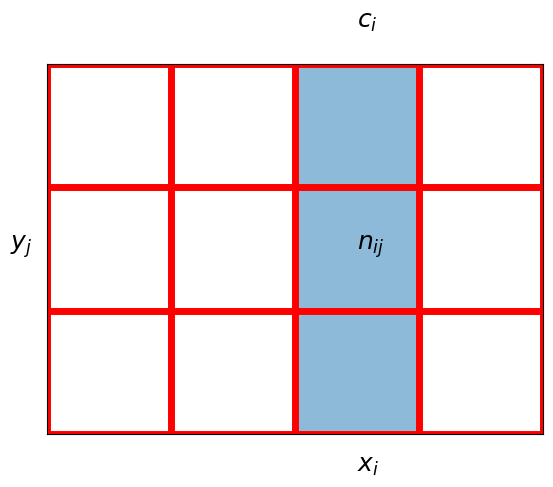

In [4]:
# Malla
plt.axhline(y=0, c='r', lw=5)
plt.axhline(y=1, c='r', lw=5)
plt.axhline(y=2, c='r', lw=5)
plt.axhline(y=3, c='r', lw=5)
plt.axvline(x=0, c='r', lw=5)
plt.axvline(x=1, c='r', lw=5)
plt.axvline(x=2, c='r', lw=5)
plt.axvline(x=3, c='r', lw=5)
plt.axvline(x=4, c='r', lw=5)
plt.text(-0.3, 1.5, '$y_j$', size=18)
plt.text(2.5, -0.3, '$x_i$', size=18)
plt.text(2.5, 1.5, '$n_{ij}$', size=18)
plt.text(2.5, 3.3, '$c_i$', size=18)
plt.arrow(2.5, 0., 0, 3., width=1, length_includes_head=False, alpha=0.5)
plt.axis([0, 4, 0, 3])
plt.xticks([])
plt.yticks([]);

Podemos observar que la probabilidad conjunta, la podemos escribir como:

$$
p(X=x^i, Y=y^j) = \frac{n_{ij}}{N} = \frac{n_{ij}}{c_i} \frac{c_{i}}{N} = p(Y=y^j | X=x^i) p(X=x^i),
$$

dando lugar a la regla del producto (**regla de la cadena**), y dando lugar a la definición de probabilidad condicional.

La **probabilidad condicional** de una V.A. $Y$ condicionada a que conocemos la V.A. $X$ (la probabilidad de $Y$ dado $X$), se define como:

$$
p(Y|X) = \frac{p(X, Y)}{p(X)},
$$

siempre que $p(X)>0$. Si $p(X)=0$, entonces $p(Y|X)$ no está definida.

La probabilidad condicional es una distribución de probabilidad válida, en el sentido que:

- $0 \leq p(Y|X) \leq 1$, y
- $\sum_{Y} p(Y|X) = 1$.

**Ejemplo.**

Supongamos que se tira una moneda justa 3 veces.

1. ¿Cuál es la probabilidad de obtener 3 caras?

<details>
  <summary>Descubrir</summary>
  
Tenemos los siguientes posibles resultados, donde C denota cara y S denota sello:
$$
\{CCC, CCS, CSC, SCC, CSS, SCS, SSC, SSS\}
$$

Todos los resultados son igualmente probables, de modo que $p(\text{3 caras}) = \frac{1}{8}$.
</details>

2. Suponga que sabemos que el primer resultado del tiro fue cara. Con esta información, ¿Cómo podemos calcular la probabilidad de obtener 3 caras?

<details>
  <summary>Descubrir</summary>
  
El conjunto de resultados se reduce a:
$$
\{CCC, CCS, CSC, CSS\}
$$

Todos los resultados son igualmente probables, de modo que $p(\text{3 caras} | \text{cara en primer tiro}) = \frac{1}{4}$.

Notemos que, a partir de la definición:

$$
p(\text{3 caras} | \text{cara en primer tiro}) = \frac{p(\text{3 caras}, \text{cara en primer tiro})}{p(\text{cara en primer tiro})} = \frac{p(\text{3 caras})}{p(\text{cara en primer tiro})} = \frac{1/8}{1/2} = \frac{1}{4}
$$
</details>

> **Observación en la notación.** Originalmente, escribimos $p(X=x)$ para referirnos al evento en que la variable aleatoria $X$ toma el valor $x$. Esta notación elimina "incertidumbre", pero es algo engorrosa. De manera que, en adelante, escribiremos simplemente $p(x)$ para referirnos a la probabilidad del evento $x$, y $p(X)$ para referirnos a la distribución de probabilidad de la V.A. $X$.

De la definición de probabilidad condicional, se desprende automáticamente lo que conocemos como **la regla de la cadena** en probabilidad:

$$
p(X, Y) = p(Y|X) p(X).
$$

Teniendo a la mano la regla de la cadena, y la marginalización, podemos escribir **la regla de probabilidad total** como:

$$
p(X) = \sum_Y p(X | Y) p(Y),
$$

y se puede entender como una constante de normalización para asegurar que la probabilidad condicional sea **una distribución de probabilidad válida**.

> De manera que, a modo de resumen:
> 
>  - $0 \leq p(X) \leq 1$: Definición de probabilidad (i)
>  - $\sum_X p(X) = 1$: Definición de probabilidad (ii)
>  - $p(X) = \sum_{Y} p(X, Y)$: Marginalización
>  - $p(X, Y) = p(Y | X) p(X) = p(X | Y) p(Y)$: Regla de la cadena
>  - $p(X) = \sum_Y p(X | Y) p(Y)$: Probabilidad total: marginalización + r. cadena
>
> La regla de la cadena, se puede extender al caso de $n$ V.A. como:
> 
> $$
  p(X_1, X_2, X_3, \dots, X_n) = p(X_1)p(X_2 | X_1) p(X_3 | X_2, X_1) \dots p(X_n | X_{n-1}, \dots, X_1).
  $$

### Ahora sí, respondamos las preguntas...

- *¿Cuál es la probabilidad de seleccionar una manzana?*
 
Primero que nada, las probabilidades que tenemos son:

<details>
  <summary>Descubrir</summary>
  
$$
p(a) = 0.4 = \frac{2}{5}, \qquad p(r) = 0.6 = \frac{3}{5}, \qquad p(n | a) = \frac{1}{4}, \qquad p(m | a) = \frac{3}{4}, \qquad p(n | r) = \frac{3}{4}, \qquad p(m | r) = \frac{1}{4}.
$$

En este sentido, y usando la regla de la probabilidad total:

$$
p(m) = p(m | a) p(a) + p(m | r) p(r) = \frac{3}{4} \times \frac{2}{5} + \frac{1}{4} \times \frac{3}{5} = \frac{9}{20}.
$$
</details>

- *Dado que elegimos una naranja, ¿Cuál es la probabilidad que la caja haya sido la azul?*

<details>
  <summary>Descubrir</summary>
  
Ahora, podemos usar la regla de Bayes:

$$
p(a | n) = \frac{p(n | a) p(a)}{p(n)}
$$

de donde ya conocemos $p(n | a)$ y la **previa** $p(a)$. Adicionalmente,

$$
p(n) = 1 - p(m) = \frac{11}{20}.
$$

Por lo cual:

$$
p(a | n) = \frac{1}{4} \times \frac{2}{5} \times \frac{20}{11} = \frac{2}{11}
$$
</details>

La respuesta a la segunda pregunta es bastante interesante, y demuestra el proceso fundamental de incorporar evidencia en un problema. 

- Notemos que, antes de saber qué fruta elegimos, **la probabilidad previa** de elegir la caja azul es $p(a) = \frac{4}{10}$.

- Ahora, al incorporar la evidencia de que la fruta que elegimos fue una naranja, observamos que **la probabilidad posterior** de elegir la caja azul disminuyó considerablemente a $p(a | n) = \frac{2}{11}$.

- Lo anterior es intuitivo, dado que la proporción de naranjas es significativamente más alta en la caja roja ($p(n | r) = \frac{3}{4}$) que en la caja azul ($p(n | a) = \frac{1}{4}$).

> Por esta bondad de añadir información de evidencia a nuestras inferencias es por lo que **la regla de Bayes es tan relevante.**

### Concepto de independencia

Seguramente, desde sus cursos básicos de probabilidad en la licenciatura recordarán lo siguiente:

> Dos V.A. $X$ y $Y$ son independiente si la distribución conjunta factoriza como el producto de marginales:
>  
> $$
  p(X, Y) = p(X) p(Y).
  $$
  
Ahora bien, la definición anterior es operativamente útil para establecer independencia, más no es para nada intuitiva en el sentido que no podemos relacionar la factorización con independencia. 

Incluso, hay casos que parecieran ser contraintuitivos, como el siguiente (Tomado de Bayesian Reasoning and Machine Learning by David Barber). Considere las V.A. binarias $X$ y $Y$, tales que:

$$
p(x^0, y^0) = 1, \qquad p(x^0, y^1) = 0, \qquad p(x^1, y^0) = 0, \qquad p(x^1, y^1) = 0.
$$

Podríamos decir intuitiva y **erróneamente** que $X$ y $Y$ son dependientes porque ambas son iguales, e iguales a $0$ con probabilidad 1 (con toda certeza). 

Sin embargo, al marginalizar obtenemos que:

$$
p(x^0) = 1, \qquad p(x^1) = 0, \qquad p(y^0) = 1, \qquad p(y^1)=0,
$$

y con esto es fácil ver que $p(X, Y) = p(X) p(Y)$ en todos los casos.

**¿Qué significa entonces independencia?**

Si movemos un poco las ecuaciones, y suponiendo que $p(X)>0$ y $p(Y)>0$, podemos ver que de la definición de probabilidad condicional:

$$
p(X | Y) = \frac{p(X, Y)}{p(Y)} = \frac{p(X) p(Y)}{p(Y)} = p(X)
$$

y similarmente

$$
p(Y | X) = p(Y).
$$

¿Y esto qué? Bueno, pues vemos que si dos variables son independientes, **la evidencia sobre una de las variables no aporta ninguna información acerca de la otra**.

En ese sentido, cuando hablamos de independencia en el contexto probabilístico, la pregunta que nos debemos hacer es **¿Conocer evidencia de una variable agrega información que no sepamos sobre otra?**

**Ejemplo.**

Se selecciona una carta de una baraja. Examinemos la independencia de 3 eventos:

- $A$: la carta es un A's.
- $C$: la carta es de corazón.
- $R$: la carta es roja.

<details>
  <summary>Descubrir</summary>
  
1. Sabemos que
  - $p(A)=\frac{4}{52}=\frac{1}{13}$ (hay 4 A's en una baraja),
  - $p(A|C)=\frac{1}{13}$ (hay una A de los 13 corazones).
  Como $p(A)=p(A|C)$, entonces sacar una A es independiente de sacar un corazón.

2. Similarmente,
  - $p(A|R)=\frac{2}{26}=\frac{1}{13}$ (hay dos A's de las 26 cartas rojas).
  Como $p(A)=p(A|R)$, entonces sacar una A es independiente de sacar una carta roja.

3. ¿Qué pasa con $C$ y $R$? Tenemos que:
  - $p(C)=\frac{13}{52}=\frac{1}{4}$
  - $p(C|R)=\frac{13}{26}=\frac{1}{2}$
  Por lo que sacar una carta roja no es independiente de sacar un corazón. Esto es intuitivo.

Notar que el último caso, lo podríamos haber analizado en el otro sentido:
  - $p(R)=\frac{26}{52}=\frac{1}{2}$
  - $p(R|H)=\frac{13}{13}=\frac{1}{1}$.
</details>

### Independencia condicional.

La independencia es una propiedad muy útil. Sin embargo, no es muy común encontrar eventos independientes cuando se analizan situaciones reales.

Por otra parte, una situación más común es encontrar eventos independientes dado un evento adicional.

Por ejemplo, supongamos que un estudiante aplica a dos prácticas profesionales en las empresas $A$ y $B$ al mismo tiempo.

Estas dos V.A., no son independientes en principio, pues saber que $A=a^1$ (el estudiante fue aceptado en la empresa $A$), aumenta la probabilidad de que $B=b^1$ y vice versa. 

Por otra parte, supongamos que las empresas obtienen tantos CVs de estudiantes, que deciden tomar la decisión de a quién aceptar con base en el promedio en la carrera, **únicamente**. 

Entonces si $X$ es la V.A. que representa el promedio de la carrera del estudiante, conocer $X$ **independiza** a las variables $A$ y $B$. Es decir

$$
p(A, B | X) = p(A| X) p(B| X),
$$

o equivalentemente,

$$
p(A | B, X) = p(A| X),
$$

o equivalentemente

$$
p(B | A, X) = p(B| X).
$$
___

### Teorema de Bayes

El teorema de Bayes es un pilar fundamental de probabilidad y estadística. Aunque su derivación es sencilla, las imlicaciones que tiene son bastante poderosas.

Dado que *la probabilidad conjunta es simétrica*, esto es $p(X, Y) = p(Y, X)$, de la definición de probabilidad condicional obtenemos que:

$$
p(Y|X) p(X) = p(X, Y) = p(Y, X) = p(X|Y) p(Y).
$$

De lo anterior, usando las igualdades de los extremos, obtenemos **la regla de Bayes**:

$$
p(Y | X) = \frac{p(X | Y) p(Y)}{p(X)}.
$$

- La regla de Bayes nos dice cómo *invertir* probabilidades condicionales, es decir, nos permite encontrar $p(Y|X)$ a partir de $p(X|Y)$.
- En la práctica, es común calcular $p(X)$ usando la regla de la probabilidad total:
  $$
  p(Y | X) = \frac{p(X | Y) p(Y)}{p(X)} = \frac{p(X | Y) p(Y)}{\sum_{Y} p(X|Y)p(Y)} .
  $$

**Ejemplo.** Se tira una moneda 5 veces. Queremos analizar los eventos 
- F: el primer tiro es cara
- T: todos los 5 tiros son cara.

En particular $p(T | F)$.

Es fácil observar que $p(F | T) = 1$. También, sabemos que $p(T) = \left(\frac{1}{2}\right)^5 = \frac{1}{32}$. Finalmente, $p(F) = \frac{1}{2}$.

Finalmente, aplicando la regla de Bayes:

$$
p(T | F) = \frac{p(F | T) p(T)}{p(F)} = \frac{1 \cdot 1/32}{1/2} = \frac{1}{16}
$$

# Anuncios parroquiales

### 1. Pueden hacer los puntos 1 y 2 de la tarea.
### 2. Para los más visuales, les recomiendo este [material](https://seeing-theory.brown.edu/basic-probability/index.html)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>